In [1]:
%matplotlib inline 
#widget
import sys 
import xarray as xr
import numpy as np
import os 
import warnings
import yaml
from random import randint
import math
from datetime import datetime, timedelta
from parcels import FieldSet, Field, VectorField, ParticleSet, JITParticle, ParcelsRandom, Variable

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

In [2]:
config = ['/home/jvalenti/scratch/OParcels_runs/Parcels_outfall/outfall_runs.yaml']
restart = 0
paths = path(0)
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

path_NEMO = make_prefix(datetime(2019, 1, 1),paths['NEMO'])
jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
def finder(lati,loni):
    j = [jjii.jj.sel(lats=lati, lons=loni, method='nearest').item()][0]
    i = [jjii.ii.sel(lats=lati, lons=loni, method='nearest').item()][0]
    return j,i

In [3]:
ds = xr.open_dataset('/home/jvalenti/MOAD/results/Graham/Run_Agosto20190801_.nc', decode_times=False)

In [4]:
coords = xr.open_dataset('/home/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

Text(0.5, 1.0, 'Salish Sea subregions')

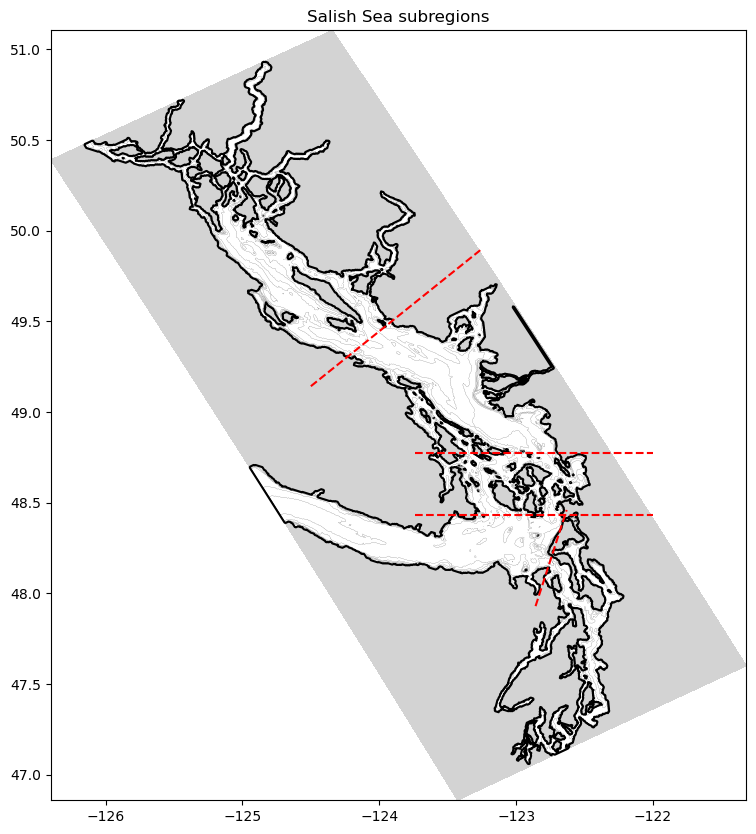

In [5]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense

fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
Xline = np.linspace(-124.5,-122,100)
yline0 = (7/3)*Xline+334.6
yline1 = (20/33)*Xline+124.597
yline2 = np.zeros_like(Xline)+48.43
yline3 = np.zeros_like(Xline)+48.774
plt.plot(Xline[65:75],yline0[65:75],'r--')
plt.plot(Xline[:50],yline1[:50],'r--')
plt.plot(Xline[30:],yline2[30:],'r--')
plt.plot(Xline[30:],yline3[30:],'r--')
plt.title('Salish Sea subregions')

In [6]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [7]:
def counting(DS,month,axs):
    DSb = DS[DS.status==2]
    DSe = DS[DS.status==3]
    DSs = DS[DS.status==1]
    count = []
    countb = []
    counte = []
    depthb = []
    for i in range(ds.dims['obs']-1):
        times= DS.time.iloc[0]+i*6*3600
        count.append(len(DSs[DSs.time == times]))
        counte.append(len(DSe[DSe.time == times]))
        countb.append(len(DSb[DSb.time == times]))
        depthb.append(np.mean(DSs[DSs.time == times].z*DSs[DSs.time == times].fact))
    axs[0,0].plot(count,label = month)
    axs[0,0].legend()
    axs[1,0].plot(countb,label = month+' bch')
    axs[1,0].plot(counte,label = month+' sed')
    axs[1,0].legend()
    beached = [(c - countb[i-1])/count[i] for i,c in enumerate(countb)]
    sediment = [(c - counte[i-1])/count[i] for i,c in enumerate(counte)]
    axs[0,1].plot(moving_average(beached[1:],5),label = month)
    twin1.plot(depthb,label = month)
    axs[0,1].legend()
    axs[1,1].plot(x[1:],sediment[1:],label = month)
    return #count,counte,countb,beached,sediment

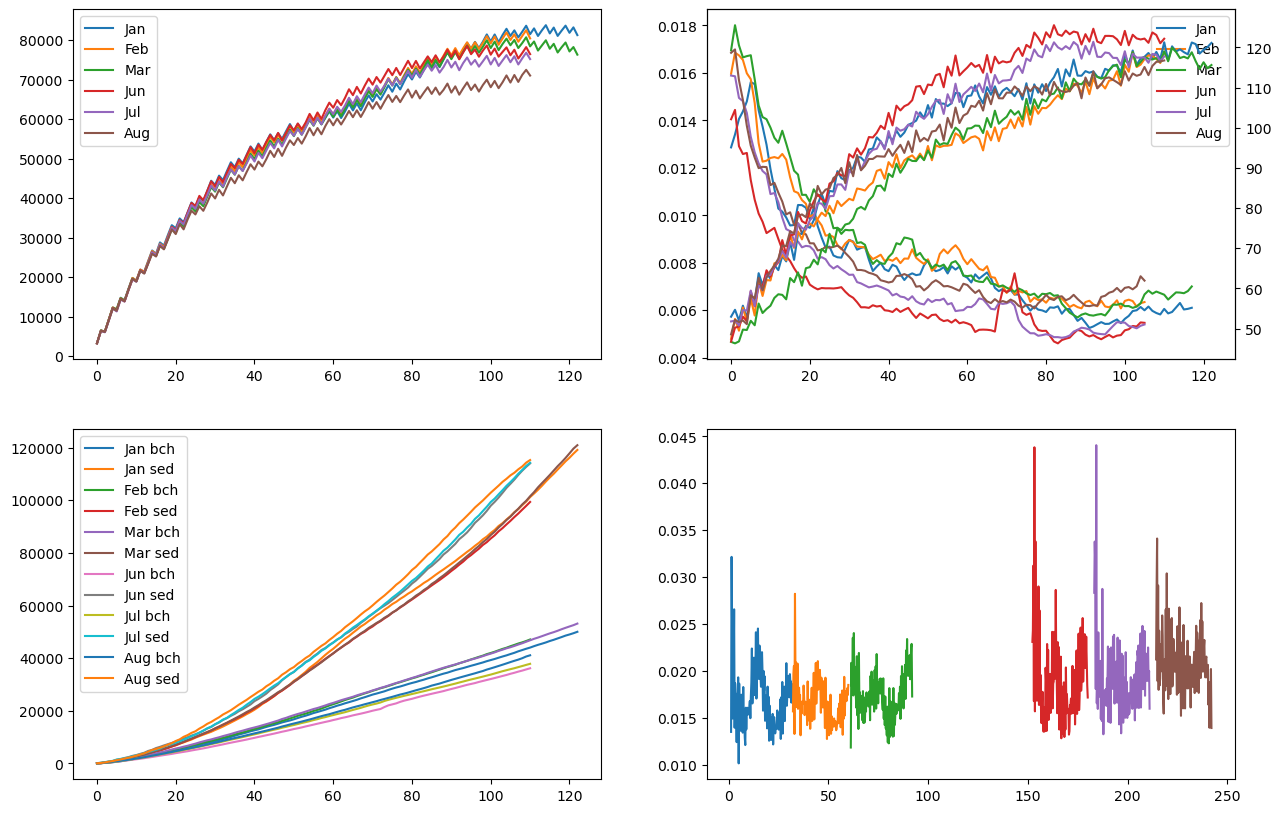

In [8]:
path_runs = '/home/jvalenti/MOAD/results/Graham/'
runs = {'Jan':['Run_Enero20190101_.nc',1],'Feb':['Run_Febrero20190201_.nc',32],'Mar':['Run_Marzo20190301_.nc',61],'Jun':['Run_Junio20190601_.nc',152],'Jul':['Run_Julio20190701_.nc',183],'Aug':['Run_Agosto20190801_.nc',214]}
fig,axs = plt.subplots(2,2,figsize=(15,10))
twin1 = axs[0,1].twinx()
for month in runs:
    ds = xr.open_dataset(path_runs+runs[month][0], decode_times=False)
    x = np.linspace(runs[month][1],int(runs[month][1]+ds.dims['obs']/4),ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    counting(DS,month,axs)


In [25]:
Point_At.hPa

""
hPa
1032.0
1032.0
1032.1
1032.1
1032.1
...
1002.9
1002.6
1002.7


(975.0, 1050.0)

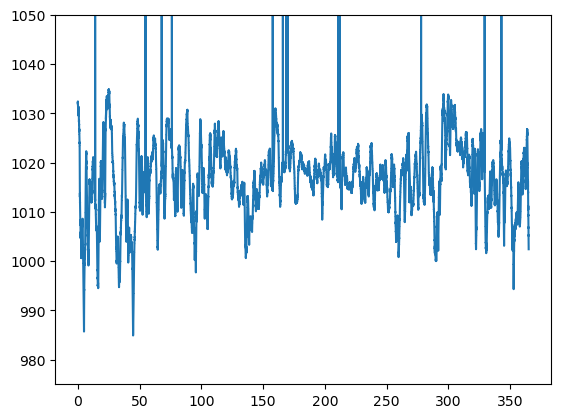

In [28]:
import pandas as pd
Point_At = pd.read_csv('Book1.csv')
# SLEV = np.array(Point_At['SLEV(metres)'])
# Days = np.array(Point_At.index)
Time=np.linspace(0,365,85910)
plt.plot(Time,Point_At.hPa)
plt.ylim(975,1050)

In [10]:
# plt.plot(Time,SLEV)

Text(0.5, 1.0, 'Salish Sea subregions')

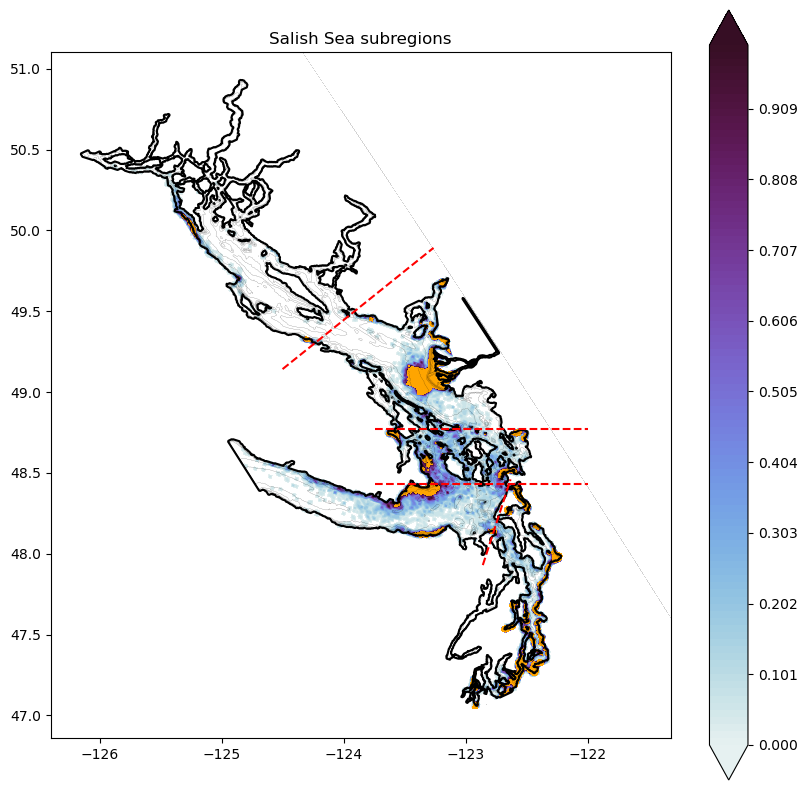

In [11]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense
levels = np.linspace(1e-7,1,100)
fig, ax = plt.subplots(1,1,figsize=(10, 10))
conc = np.load(path_runs+'Run_Enero20190101_.nc.npy')
conc2 = np.load(path_runs+'Run_Febrero20190201_.nc.npy')
conc3 = np.load(path_runs+'Run_Marzo20190301_.nc.npy')
conc_winter = (conc + conc2 + conc3)/3

conc = np.load(path_runs+'Run_Junio20190601_.nc.npy')
conc2 = np.load(path_runs+'Run_Julio20190701_.nc.npy')
conc3 = np.load(path_runs+'Run_Agosto20190801_.nc.npy')
conc_summer = (conc + conc2 + conc3)
Ni = 3

ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
aa = ax.contourf(coords.nav_lon[::Ni,::Ni], coords.nav_lat[::Ni,::Ni],np.sum(conc_summer[:5,:,:],axis=0),levels=levels,extend='both',cmap=cm)
plt.colorbar(aa)
aa.cmap.set_over('orange')
aa.cmap.set_under('white')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
Xline = np.linspace(-124.5,-122,100)
yline0 = (7/3)*Xline+334.6
yline1 = (20/33)*Xline+124.597
yline2 = np.zeros_like(Xline)+48.43
yline3 = np.zeros_like(Xline)+48.774
plt.plot(Xline[65:75],yline0[65:75],'r--')
plt.plot(Xline[:50],yline1[:50],'r--')
plt.plot(Xline[30:],yline2[30:],'r--')
plt.plot(Xline[30:],yline3[30:],'r--')
plt.title('Salish Sea subregions')